# Step 1 : Importing Essetial Libraries

In [1]:
#pip install graphviz pydotplus

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split



import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [17]:
#import splitfolders

#input_folder = r'F:\MV\Dataset\IMG_CLASSES'

# Split with a ratio
# To only split into training and validation set, set a tuple to ratio, i.e; 80/20
#Train, val, test
#splitfolders.ratio(input_folder, output=r'c', 
                  # seed=42, ratio=(.7, .1, .2), 
                  # group_prefix=None) # default values

In [18]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.001, momentum=0.9)

# Step 2 : Importing Data and Creating a Dataframe

In [19]:
import os
import pandas as pd

train_dir = r'archive/cars_tanks/train'
test_dir = r'archive/cars_tanks/test'

# Create dataframes
train_df = pd.DataFrame(columns=['image_path', 'label'])
test_df = pd.DataFrame(columns=['image_path', 'label'])

# Add images paths and labels to dataframes
for label, directory in enumerate(os.listdir(train_dir)):
    for filename in os.listdir(os.path.join(train_dir, directory)):
        image_path = os.path.join(train_dir, directory, filename)
        train_df = train_df._append({'image_path': image_path, 'label': label}, ignore_index=True)

for label, directory in enumerate(os.listdir(test_dir)):
    for filename in os.listdir(os.path.join(test_dir, directory)):
        image_path = os.path.join(test_dir, directory, filename)
        test_df = test_df._append({'image_path': image_path, 'label': label}, ignore_index=True)
        
# Combine train_df and test_df into one dataframe
df = pd.concat([train_df, test_df], ignore_index=True)
del test_df,train_df
df

,image_path,label
0,archive/cars_tanks/train/cars/0.jpg,0
1,archive/cars_tanks/train/cars/1.jpg,0
2,archive/cars_tanks/train/cars/10.jpg,0
3,archive/cars_tanks/train/cars/100.jpg,0
4,archive/cars_tanks/train/cars/101.jpg,0
...,...,...
1498,archive/cars_tanks/test/tanks/663.jpg,1
1499,archive/cars_tanks/test/tanks/664.jpg,1
1500,archive/cars_tanks/test/tanks/665.jpg,1
1501,archive/cars_tanks/test/tanks/666.jpg,1


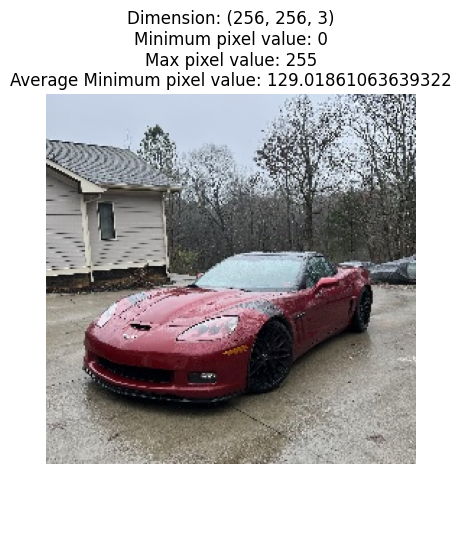

Random Image Path: archive/cars_tanks/train/cars/730.jpg


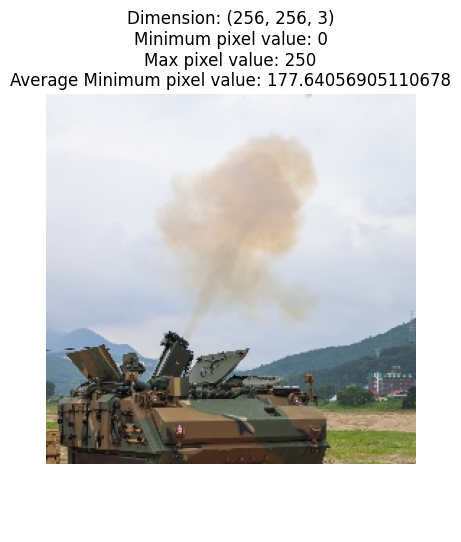

Random Image Path: archive/cars_tanks/train/tanks/188.jpg


In [20]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def get_random_image_path(folder_path):
    if not os.path.exists(folder_path):
        print(f"error: folder '{folder_path}' n。")
        return None

    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"error: folder '{folder_path}' no image")
        return None

    random_image_filename = random.choice(image_files)
    random_image_path = os.path.join(folder_path, random_image_filename)

    return random_image_path

def load_image(file_path):
    return np.array(Image.open(file_path))

def show_image_with_info(image, info_text):
    
    plt.imshow(image, cmap="gray")
    plt.title(info_text)
    plt.axis("off")

    plt.text(0.5, -0.1, info_text, color='white', fontsize=10, ha='center', va='center', transform=plt.gca().transAxes)

    plt.show()


car_path = r'archive/cars_tanks/train/cars'
random_car_path = get_random_image_path(car_path)
if random_car_path:
    image_car = load_image(random_car_path)
    image_info_car = f"Dimension: {image_car.shape}\nMinimum pixel value: {np.min(image_car)}\nMax pixel value: {np.max(image_car)}\nAverage Minimum pixel value: {np.mean(image_car)}"
    
    show_image_with_info(image_car, image_info_car)
    print(f"Random Image Path: {random_car_path}")



tank_path = r'archive/cars_tanks/train/tanks'
random_tank_path = get_random_image_path(tank_path)
if random_tank_path:
    image_tank = load_image(random_tank_path)
    image_info_tank = f"Dimension: {image_tank.shape}\nMinimum pixel value: {np.min(image_tank)}\nMax pixel value: {np.max(image_tank)}\nAverage Minimum pixel value: {np.mean(image_tank)}"
    
    show_image_with_info(image_tank, image_info_tank)
    print(f"Random Image Path: {random_tank_path}")


In [21]:
# Get list of directories in train_dir
labels = os.listdir(train_dir)

# Create label_map dictionary
label_map = {i: label for i, label in enumerate(labels)}
num_classes=len(label_map)
label_map

{0: 'cars', 1: 'tanks'}

# Step 3 : EDA

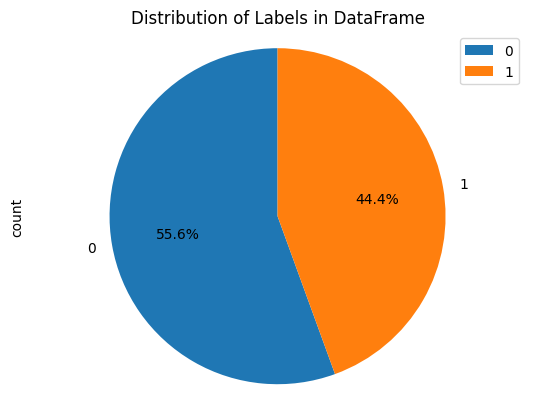

In [22]:
# Plot pie chart of train_df
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['label'].unique())
plt.show()

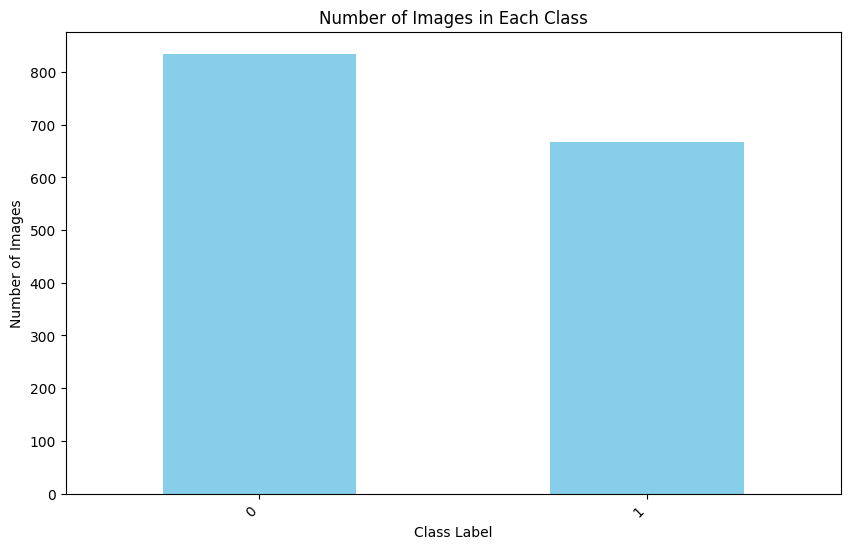


Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               cars                           835       
1               tanks                          668       
------------------------------------------------------------
Total                                         1503      


In [23]:
import matplotlib.pyplot as plt

# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()

# Plot the number of images in each class
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Images in Each Class')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the detailed summary
print("\nDataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

# Step 4 : Loading and resizing of images

In [24]:
max_images_per_class = 2500

# Group by label column and take first max_images_per_class rows for each group
df = df.groupby("label").apply(lambda x: x.head(max_images_per_class)).reset_index(drop=True)

In [25]:
import tensorflow as tf

# Allow gpu usage
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [26]:
import multiprocessing

# Get the number of CPU cores available
max_workers = multiprocessing.cpu_count()
max_workers

64

In [27]:
import concurrent.futures

# Define a function to resize image arrays
def resize_image_array(image_path):
    return np.asarray(Image.open(image_path).resize((100,100)))

# Use concurrent.futures to parallelize the resizing process
with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
    # Use executor.map to apply the function to each image path in the DataFrame
    image_arrays = list(executor.map(resize_image_array, df['image_path'].tolist()))


# Add the resized image arrays to the DataFrame
df['image'] = image_arrays
del image_arrays

In [28]:
def get_image_paths_from_dataframe(df):
    if 'image_path' in df.columns:
        return df['image_path'].tolist()
    else:
        print("error: DataFrame not exist 'image_path' volume。")
        return None


image_paths = get_image_paths_from_dataframe(df)


# print("Image Paths:")
# for path in image_paths:
#     print(path)

In [29]:
image_paths = df['image_path'].tolist()

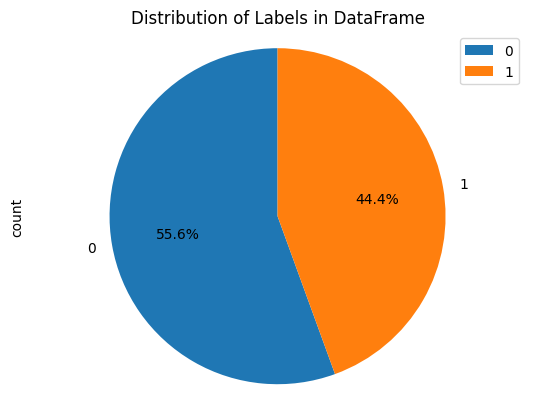

In [31]:
# Plot pie chart of train_df
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['label'].unique())
plt.show()

In [32]:
df.head()

,image_path,label,image
0,archive/cars_tanks/train/cars/0.jpg,0,"[[[106, 136, 197], [105, 135, 195], [105, 135,..."
1,archive/cars_tanks/train/cars/1.jpg,0,"[[[182, 182, 192], [182, 182, 192], [182, 182,..."
2,archive/cars_tanks/train/cars/10.jpg,0,"[[[95, 96, 90], [96, 97, 91], [99, 100, 94], [..."
3,archive/cars_tanks/train/cars/100.jpg,0,"[[[199, 208, 211], [185, 189, 198], [185, 187,..."
4,archive/cars_tanks/train/cars/101.jpg,0,"[[[86, 100, 103], [16, 26, 19], [14, 20, 13], ..."


> # Displaying the total number of images of each Class before Data Augmentation

In [33]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               cars                           835       
1               tanks                          668       
------------------------------------------------------------
Total                                         1503      


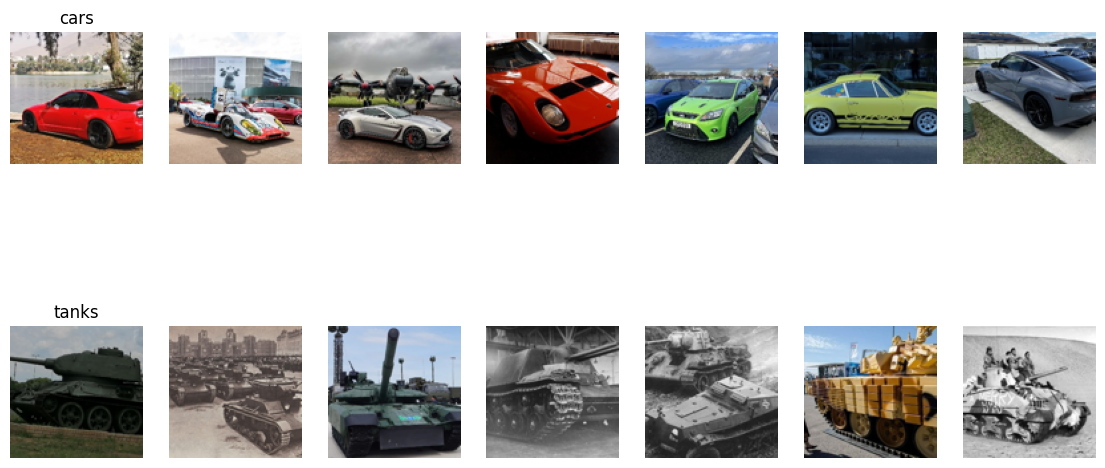

In [35]:
n_samples = 7
fig, m_axs = plt.subplots(num_classes, n_samples, figsize=(2*n_samples, 1*7))
for n_axs, (class_idx, class_rows) in zip(m_axs, df.sort_values(['label']).groupby('label')):
    class_name = label_map[class_idx] # get the class name using label_map
    n_axs[0].set_title(class_name)
    for c_ax, (_, c_row) in zip(n_axs, class_rows.sample(n_samples, random_state=5).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

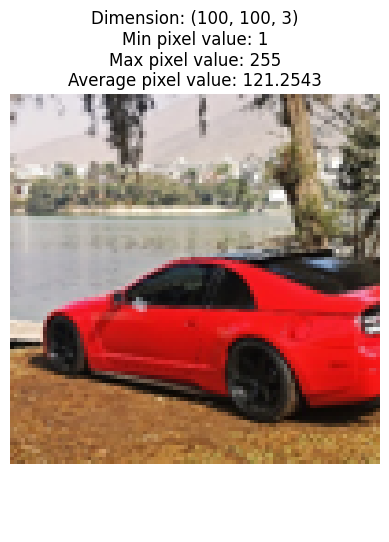

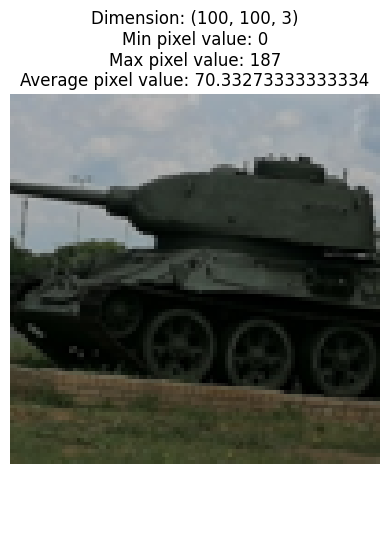

<Figure size 640x480 with 0 Axes>

In [36]:

n_samples = 1
for class_idx, class_rows in df.sort_values(['label']).groupby('label'):
    class_name = label_map[class_idx]
    class_rows = class_rows.sample(n_samples, random_state=5)

    for idx, (_, c_row) in enumerate(class_rows.iterrows()):
        resized_image = resize_image_array(c_row['image_path'])
        image_info = f"Dimension: {resized_image.shape}\nMin pixel value: {np.min(resized_image)}\nMax pixel value: {np.max(resized_image)}\nAverage pixel value: {np.mean(resized_image)}"
        
        row_index = 0 if class_idx == 0 else 1
        show_image_with_info(resized_image, image_info)
        m_axs[row_index, idx].set_title(class_name)
        m_axs[row_index, idx].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [37]:
df['image'].map(lambda x: x.shape).value_counts()

image
(100, 100, 3)    1503
Name: count, dtype: int64

# Step 5 : Data Augmentation

In [38]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with the desired transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [39]:
# Create an empty dataframe to store the augmented images
augmented_df = pd.DataFrame(columns=['image_path', 'label', 'image'])

# Loop through each class label and generate additional images if needed
for class_label in df['label'].unique():
    # Get the image arrays for the current class
    image_arrays = df.loc[df['label'] == class_label, 'image'].values
    
    # Calculate the number of additional images needed for the current class
    num_images_needed = max_images_per_class - len(image_arrays)
    
    # Generate augmented images for the current class
    if num_images_needed > 0:
        # Select a random subset of the original images
        selected_images = np.random.choice(image_arrays, size=num_images_needed)
        
        # Apply transformations to the selected images and add them to the augmented dataframe
        for image_array in selected_images:
            # Reshape the image array to a 4D tensor with a batch size of 1
            image_tensor = np.expand_dims(image_array, axis=0)
            
            # Generate the augmented images
            augmented_images = datagen.flow(image_tensor, batch_size=1)
            
            # Extract the augmented image arrays and add them to the augmented dataframe
            for i in range(augmented_images.n):
                augmented_image_array = augmented_images.next()[0].astype('uint8')
                augmented_df = augmented_df._append({'image_path': None, 'label': class_label, 'image': augmented_image_array}, ignore_index=True)
    
    # Add the original images for the current class to the augmented dataframe
    original_images_df = df.loc[df['label'] == class_label, ['image_path', 'label', 'image']]
    augmented_df = augmented_df._append(original_images_df, ignore_index=True)

# Group the augmented dataframe by the 'label' column and filter out extra images
df = augmented_df.groupby('label').head(max_images_per_class)

del augmented_df

# Use the augmented dataframe for further processing
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

> # Displaying the total number of images of each Class after Data Augmentation

In [40]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               cars                           2500      
1               tanks                          2500      
------------------------------------------------------------
Total                                         5000      


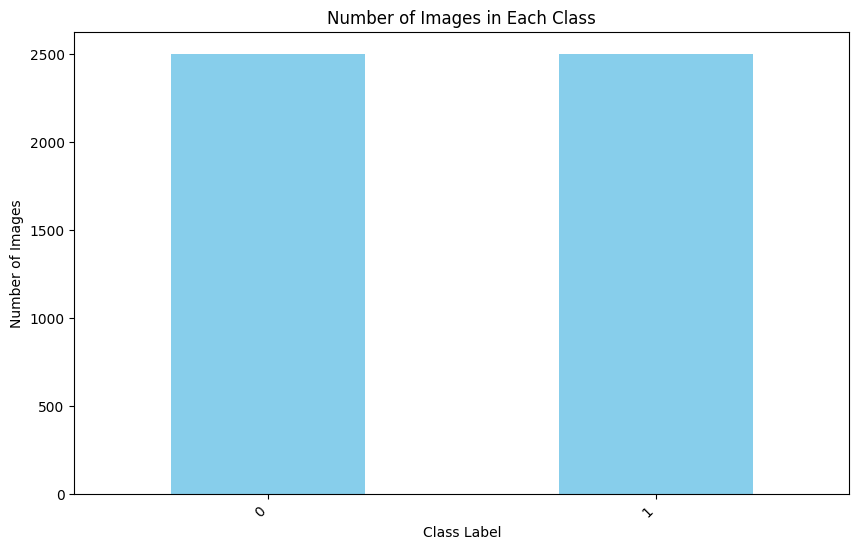


Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               cars                           2500      
1               tanks                          2500      
------------------------------------------------------------
Total                                         5000      


In [41]:
import matplotlib.pyplot as plt

# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()

# Plot the number of images in each class
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Images in Each Class')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the detailed summary
print("\nDataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")


# Step 6 : Train and Test split

In [42]:
features = df.drop(columns=['label','image_path'],axis=1)
target = df['label']

In [43]:
#features.head()

In [44]:
#target.head()

In [45]:
print(target.shape,features.shape)

(5000,) (5000, 1)


In [46]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.15,shuffle=True)

# Step 7 : Normalization of Data

In [47]:
x_train = np.asarray(x_train['image'].tolist())
x_test = np.asarray(x_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


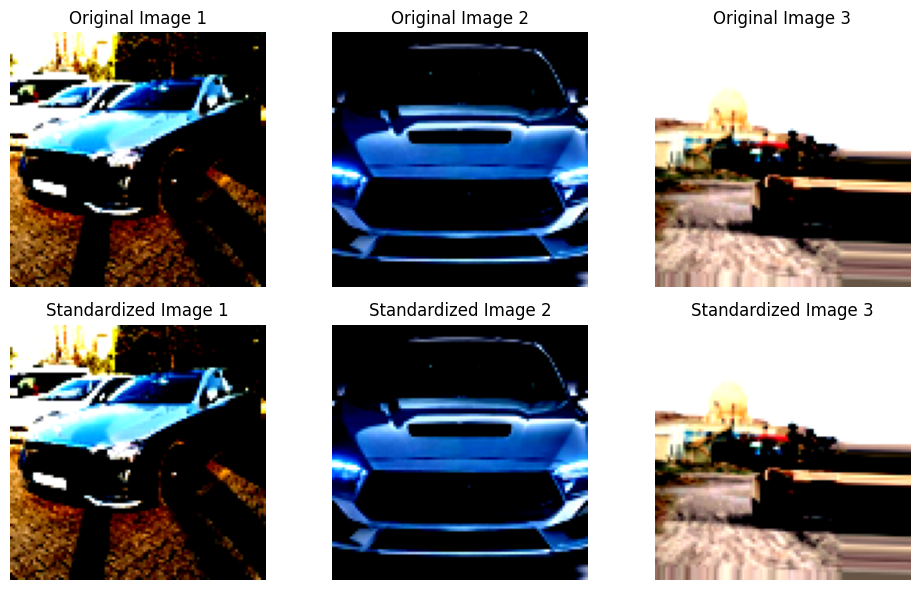

In [48]:
import matplotlib.pyplot as plt
import random

# Randomly select a few images
sample_indices = random.sample(range(len(x_train)), 3)

# Plot the original and standardized images
plt.figure(figsize=(10, 6))
for i, idx in enumerate(sample_indices, 1):
    plt.subplot(2, 3, i)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f'Original Image {i}')
    plt.axis('off')

    plt.subplot(2, 3, i + 3)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f'Standardized Image {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Step 8 : Label Encoding

In [49]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train,num_classes = num_classes)
y_test = to_categorical(y_test,num_classes = num_classes)

# Step 9 : Splitting the data into training and Validation Split

In [50]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.15,shuffle=True)

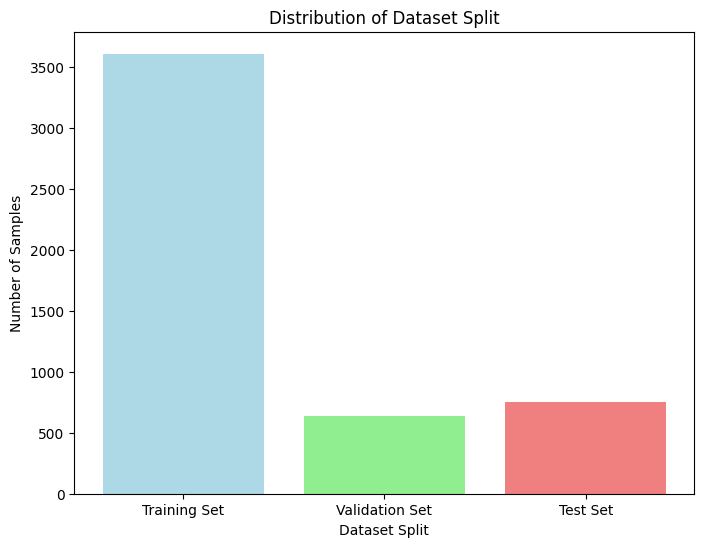

In [51]:
# Calculate the size of each set
train_size = len(x_train)
test_size = len(x_test)
validation_size = len(features) - train_size - test_size

# Plot the bar chart
labels = ['Training Set', 'Validation Set', 'Test Set']
sizes = [train_size, validation_size, test_size]
colors = ['lightblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colors)
plt.title('Distribution of Dataset Split')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Samples')
plt.show()

In [52]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 100, 3))

In [53]:
y_train = y_train.astype(int)
y_validate = y_validate.astype(int)

> # Displaying the total number of images of each Class

In [54]:
# Calculate the number of images in each class for train, validation, and test datasets
train_counts = np.sum(y_train, axis=0)
val_counts = np.sum(y_validate, axis=0)
test_counts = np.sum(y_test, axis=0)

# Print the number of images in each class for train, validation, and test datasets
print("Dataset Summary")
print("-" * 90)
print(f"{'Class Label':<15} {'Class Name':<30} {'Train':<10} {'Validation':<12} {'Test':<10} {'Total':<10}")
print("-" * 90)
for class_label, class_name in label_map.items():
    train_num = int(train_counts[class_label])
    val_num = int(val_counts[class_label])
    test_num = int(test_counts[class_label])
    total_num = train_num + val_num + test_num
    print(f"{class_label:<15} {class_name:<30} {train_num:<10} {val_num:<12} {test_num:<10} {total_num:<10}")
print("-" * 90)
print(f"{'Total':<46} {len(y_train):<10} {len(y_validate):<12} {len(y_test):<10} {len(y_train) + len(y_validate) + len(y_test):<10}")

Dataset Summary
------------------------------------------------------------------------------------------
Class Label     Class Name                     Train      Validation   Test       Total     
------------------------------------------------------------------------------------------
0               cars                           1809       319          372        2500      
1               tanks                          1803       319          378        2500      
------------------------------------------------------------------------------------------
Total                                          3612       638          750        5000      


In [55]:
df.groupby('label').size()

label
0    2500
1    2500
dtype: int64

In [56]:
input_shape = df['image'][0].shape

In [57]:
print(input_shape)

(100, 100, 3)


In [58]:
def custom_loss(y_true, y_pred):
    m = tf.shape(y_true)[0]  
    total_cost = 0.0
    for i in range(m):
        y_pred_i = tf.clip_by_value(y_pred[i], 1e-7, 1 - 1e-7)
        
        # Cast y_true to float32
        y_true_float = tf.cast(y_true[i], dtype=tf.float32)
        
        cost = -tf.reduce_sum(y_true_float * tf.math.log(y_pred_i))
        total_cost += cost
    total_cost = total_cost / tf.cast(m, dtype=tf.float32)
    return total_cost


def custom_acc(y_true, y_pred):
    y_pred_classes = tf.argmax(y_pred, axis=1)
    y_true_classes = tf.argmax(y_true, axis=1)
    correct_predictions = tf.reduce_sum(tf.cast(tf.equal(y_pred_classes, y_true_classes), tf.float32))
    total_samples = tf.cast(tf.shape(y_true)[0], tf.float32)
    acc = correct_predictions / total_samples
    return acc

# Step 10 : Model Architecture

## Fit Function

In [73]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def train_ensemble_model(ensemble_model, x_train, y_train, x_validate, y_validate, epochs=50, batch_size=32, lr_reduction_factor=0.5, lr_patience=3, early_stopping_patience=5, min_lr=0.00001):
    # Set a learning rate annealer
    learning_rate_reduction = ReduceLROnPlateau(monitor='loss',
                                                patience=lr_patience,
                                                verbose=1,
                                                factor=lr_reduction_factor,
                                                min_lr=min_lr)

    # Train the model
    history = ensemble_model.fit(x=x_train,
                                 y=y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 validation_data=(x_validate, y_validate),
                                 callbacks=[learning_rate_reduction,
                                            EarlyStopping(monitor='loss',
                                                          patience=early_stopping_patience,
                                                          restore_best_weights=True)])

    return history



## Plot Function

In [60]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    # Get training and testing accuracy and loss histories
    training_accuracy = history.history['accuracy']
    testing_accuracy = history.history['val_accuracy']
    training_loss = history.history['loss']
    testing_loss = history.history['val_loss']

    # Plot training and testing accuracy curves
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(training_accuracy, label='Training Accuracy')
    plt.plot(testing_accuracy, label='Testing Accuracy')
    plt.title('Training vs Testing Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training and testing loss curves
    plt.subplot(1, 2, 2)
    plt.plot(training_loss, label='Training Loss')
    plt.plot(testing_loss, label='Testing Loss')
    plt.title('Training vs Testing Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()



## 10 Metrics

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, precision_recall_curve
from sklearn.metrics import confusion_matrix

def plot_curves(y_true, y_scores):
    # ROC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_true, y_scores)

    threshold = 0.5
    y_pred = [1 if score >= threshold else 0 for score in y_scores]
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_true, y_pred)

    # ROC-AUC
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 3, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC CURVE')
    plt.legend(loc="lower right")

    # Recall
    plt.subplot(3, 3, 2)
    plt.plot(recall, label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Recall')
    plt.title('RECALL CURVE')
    plt.legend(loc="lower right")

    # Precision
    plt.subplot(3, 3, 3)
    plt.plot(precision, label='Precision')
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.title('PRECISION CURVE')
    plt.legend(loc="lower right")

    thresholds = np.linspace(0, 1, 100)  

    sensitivities = [recall_score(y_true, [1 if score >= t else 0 for score in y_scores]) for t in thresholds]
    specificities = [tn / (tn + fp) for t in thresholds]
    f1_scores = [f1_score(y_true, [1 if score >= t else 0 for score in y_scores]) for t in thresholds]

    # Sensitivity
    plt.subplot(3, 3, 4)
    plt.plot(thresholds, sensitivities, label='Sensitivity')
    plt.xlabel('Threshold')
    plt.ylabel('Sensitivity')
    plt.title('SENSITIVITY CURVE')
    plt.legend(loc="lower right")

    # Specificity
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    tnr = 1 - fpr  # True Negative Rate
    plt.subplot(3, 3, 5)
    plt.plot(tnr, tpr, color='green', lw=2, label='Specificity curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('True Negative Rate (Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Specificity Curve')
    plt.legend(loc='lower right')


    # F1 Score
    plt.subplot(3, 3, 6)
    plt.plot(thresholds, f1_scores, label='F1 Score')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 SCORE CURVE')
    plt.legend(loc="lower right")

    # Precision-Recall
    plt.subplot(3, 3, 7)
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PRECISION-RECALL CURVE')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()


## PrintOut Value of Metrics

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

def calculate_and_print_metrics(y_true, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    kappa = cohen_kappa_score(y_true, y_pred)

    # Print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Kappa score: {kappa:.4f}")





# Model 1

In [63]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, MaxPooling2D, Flatten, Input, Dense, GlobalAveragePooling2D, Reshape, Multiply
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# #def attention moudle
from tensorflow.keras.layers import Layer
class SelfAttention(Layer):
    def __init__(self, filters):
        super(SelfAttention, self).__init__()
        self.filters = filters

    def build(self, input_shape):
        self.Wq = Dense(self.filters)
        self.Wk = Dense(self.filters)
        self.Wv = Dense(self.filters)
        self.Ws = Dense(1, activation='sigmoid')
        super(SelfAttention, self).build(input_shape)

    def call(self, inputs):
        q = self.Wq(inputs)
        k = self.Wk(inputs)
        v = self.Wv(inputs)

        attention_scores = tf.matmul(q, k, transpose_b=True)
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)

        attended_values = tf.matmul(attention_weights, v)

        # Apply spatial attention weights
        avg_pool = GlobalAveragePooling2D()(attended_values)
        avg_pool = Reshape((1, 1, self.filters))(avg_pool)
        spatial_weights = self.Ws(avg_pool)
        attended_inputs = Multiply()([attended_values, spatial_weights])

        return attended_inputs

import tensorflow as tf
from tensorflow.keras import layers, models

def depthwise_separable_conv(x, filters, kernel_size, strides):
    x = layers.DepthwiseConv2D(kernel_size, strides=strides, padding='same', depth_multiplier=1, activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, (1, 1), padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def build_mobilenetv2(input_shape, num_classes):
    input_layer = layers.Input(shape=input_shape)

    # Initial Convolution
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation=None)(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Depthwise Separable Convolution Blocks
    x = depthwise_separable_conv(x, 32, (3, 3), (1, 1))
    x = depthwise_separable_conv(x, 64, (3, 3), (2, 2))
    x = depthwise_separable_conv(x, 64, (3, 3), (1, 1))
    x = SelfAttention(32)(x)

    # Middle Flow
    for _ in range(5):
        x = depthwise_separable_conv(x, 32, (3, 3), (1, 1))

    # Exit Flow
    x = depthwise_separable_conv(x, 64, (3, 3), (2, 2))
    x = depthwise_separable_conv(x, 64, (3, 3), (1, 1))

    # Global Average Pooling and Dense Layer
    x = layers.GlobalAveragePooling2D()(x)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)

    return model



input_shape = (100, 100, 3)  
num_classes = 2  t

# Build the MobileNetV2 model
model1 = build_mobilenetv2(input_shape, num_classes)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 batch_normalization_27 (Bat  (None, 50, 50, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_27 (ReLU)             (None, 50, 50, 32)        0         
                                                                 
 depthwise_conv2d_14 (Depthw  (None, 50, 50, 32)       320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_28 (Bat  (None, 50, 50, 32)       128 

In [50]:
history1 = train_ensemble_model(model1, x_train, y_train, x_validate, y_validate)

Epoch 1/300


2023-12-13 23:36:13.758525: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-12-13 23:36:15.304193: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


113/113 [==============================] - 10s 36ms/step - loss: 0.6327 - accuracy: 0.6415 - val_loss: 0.7486 - val_accuracy: 0.5204 - lr: 0.0010
Epoch 2/300
113/113 [==============================] - 3s 28ms/step - loss: 0.5317 - accuracy: 0.7442 - val_loss: 0.8502 - val_accuracy: 0.5204 - lr: 0.0010
Epoch 3/300
113/113 [==============================] - 2s 21ms/step - loss: 0.4697 - accuracy: 0.7896 - val_loss: 0.8987 - val_accuracy: 0.5204 - lr: 0.0010
Epoch 4/300
113/113 [==============================] - 2s 20ms/step - loss: 0.4307 - accuracy: 0.8062 - val_loss: 0.9240 - val_accuracy: 0.5204 - lr: 0.0010
Epoch 5/300
113/113 [==============================] - 2s 22ms/step - loss: 0.4038 - accuracy: 0.8242 - val_loss: 0.8541 - val_accuracy: 0.5909 - lr: 0.0010
Epoch 6/300
113/113 [==============================] - 2s 22ms/step - loss: 0.3898 - accuracy: 0.8270 - val_loss: 0.8918 - val_accuracy: 0.6050 - lr: 0.0010
Epoch 7/300
113/113 [==============================] - 2s 21ms/step -

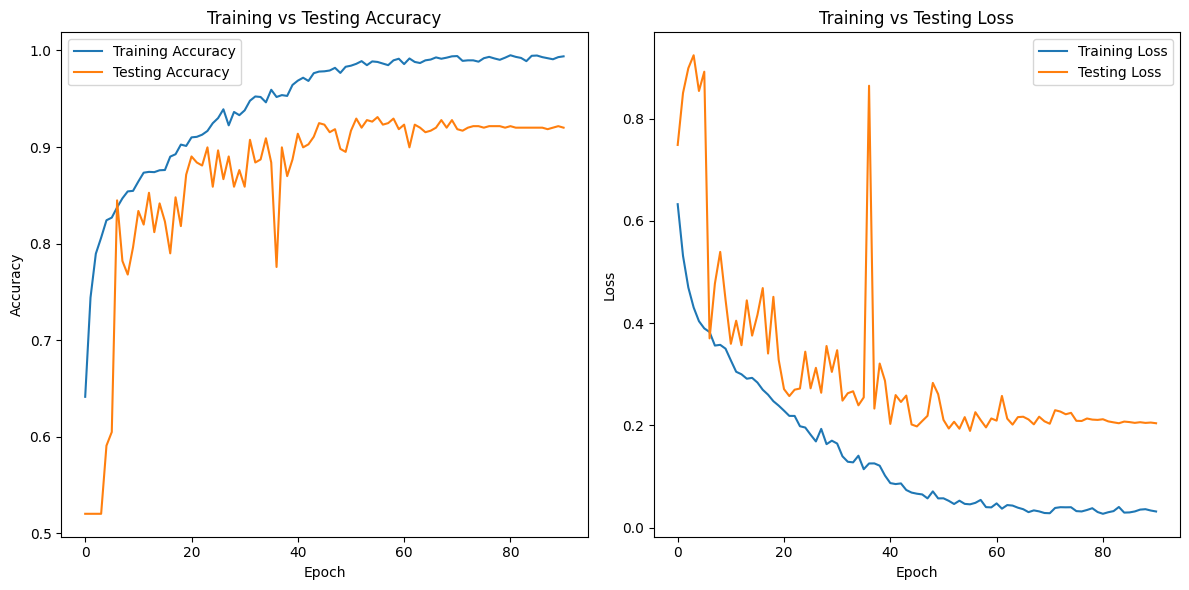

In [51]:
plot_accuracy_and_loss(history1)

In [52]:
loss, accuracy = model1.evaluate(x_train, y_train, verbose=1)
print("Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = model1.evaluate(x_test, y_test, verbose=1)
print("Testing: accuracy = %f  ;  loss = %f" % (accuracy, loss))

113/113 [==============================] - 1s 8ms/step - loss: 0.0081 - accuracy: 0.9994
Train: accuracy = 0.999446  ;  loss = 0.008109
24/24 [==============================] - 1s 9ms/step - loss: 0.2792 - accuracy: 0.8973
Testing: accuracy = 0.897333  ;  loss = 0.279238


24/24 [==============================] - 1s 7ms/step


<Axes: >

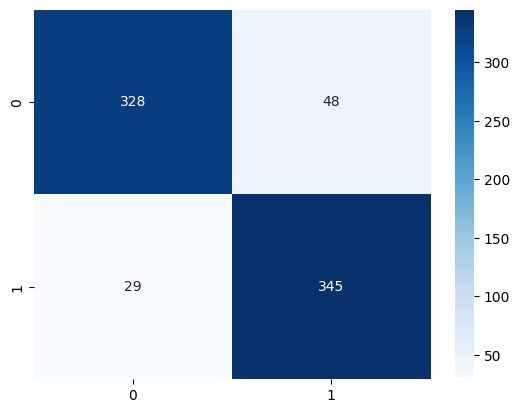

In [53]:
# Convert multilabel to single label
y_pred_prob_mdoel1 = model1.predict(x_test)


y_true_model1 = np.argmax(y_test, axis=1)
y_pred_proba_model1 = np.argmax(y_pred_prob_mdoel1, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_model1, y_pred_proba_model1)

# Plot the confusion matrix using Seaborn with integer formatting
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


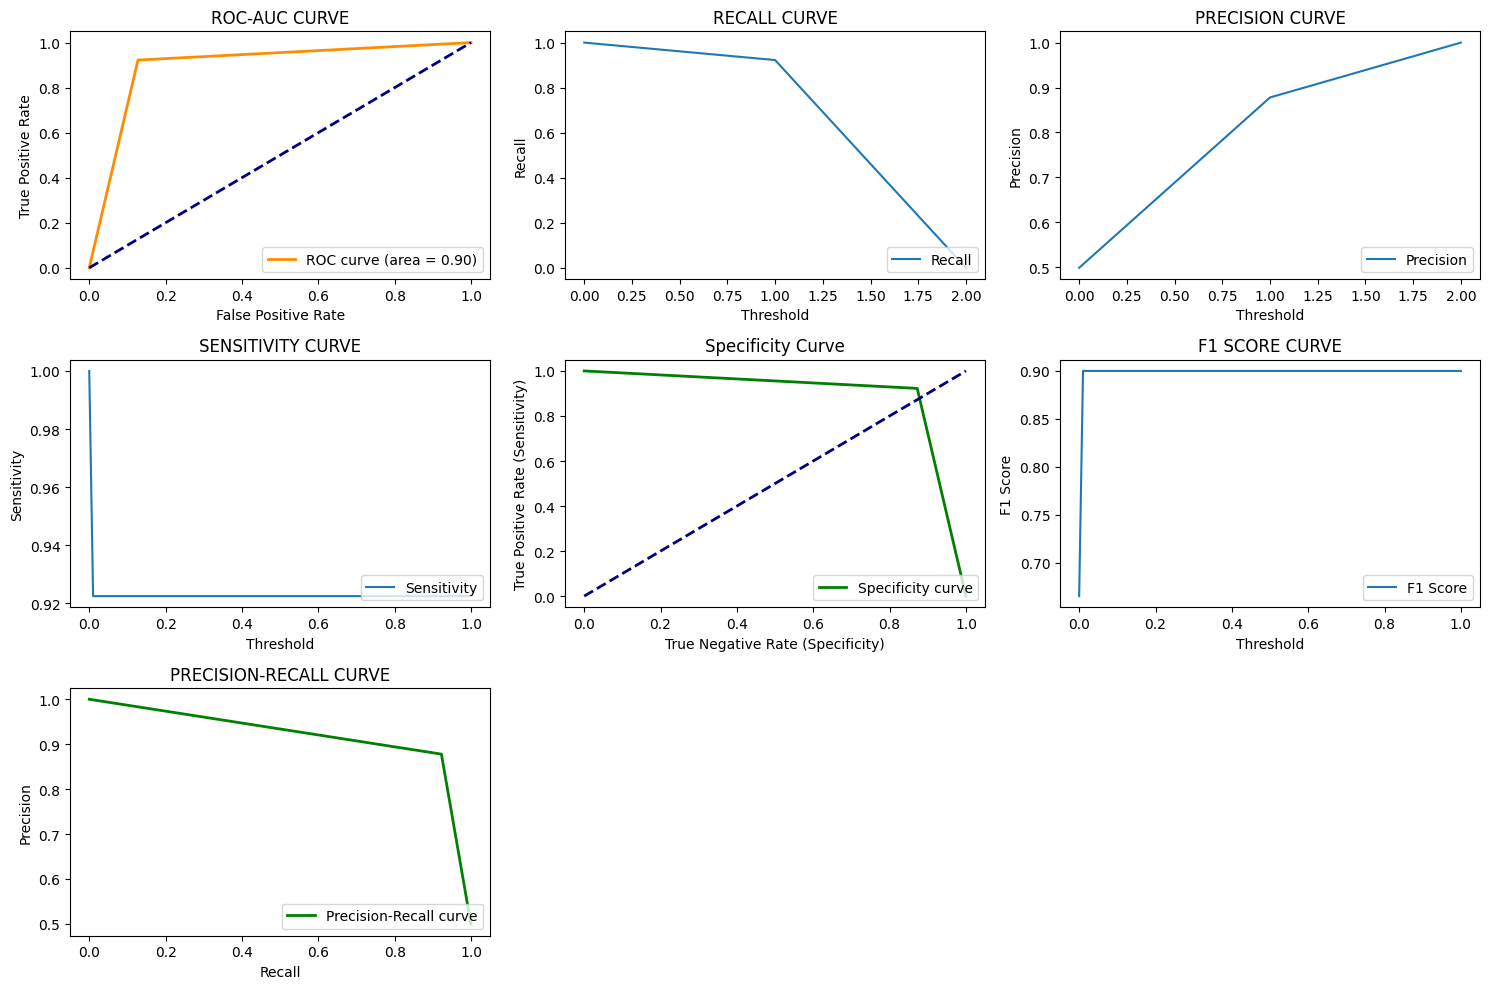

In [54]:
plot_curves(y_true_model1, y_pred_proba_model1)

In [55]:
calculate_and_print_metrics(np.argmax(y_test, axis=1), y_pred_proba_model1)

Accuracy: 0.8973
Precision: 0.8983
Recall: 0.8974
F1-score: 0.8973
Kappa score: 0.7947


# Model2

In [64]:
from keras.layers import DepthwiseConv2D,ReLU
def Depthwise_CNN(input_shape, num_classes):
    input_layer = Input(shape=input_shape)

    # Depthwise separable convolution block 1
    x = DepthwiseConv2D(3, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(64, (1, 1))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)


    # Depthwise separable convolution block 2
    x = DepthwiseConv2D(3, strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(128, (1, 1))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = SelfAttention(64)(x)

    # Depthwise separable convolution block 3
    x = DepthwiseConv2D(3, strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(256, (1, 1))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Assuming you have a custom Attention layer
    x = SelfAttention(64)(x)


    output = GlobalAveragePooling2D()(x)
    output = Dense(num_classes, activation='softmax')(output)

    model = Model(inputs=input_layer, outputs=output)

    return model

# Example usage
input_shape = (100, 100, 3)  # Adjust according to your image size and channels
num_classes = 2  # Adjust based on your classification task

model2 = Depthwise_CNN(input_shape, num_classes)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 depthwise_conv2d_24 (Depthw  (None, 100, 100, 3)      30        
 iseConv2D)                                                      
                                                                 
 batch_normalization_48 (Bat  (None, 100, 100, 3)      12        
 chNormalization)                                                
                                                                 
 re_lu_48 (ReLU)             (None, 100, 100, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 100, 100, 64)      256       
                                                                 
 batch_normalization_49 (Bat  (None, 100, 100, 64)     256 

In [57]:
history2 = train_ensemble_model(model2, x_train, y_train, x_validate, y_validate)

Epoch 1/300
113/113 [==============================] - 3s 19ms/step - loss: 0.7293 - accuracy: 0.4175 - val_loss: 0.6989 - val_accuracy: 0.5204 - lr: 1.0000e-05
Epoch 2/300
113/113 [==============================] - 2s 21ms/step - loss: 0.7210 - accuracy: 0.4283 - val_loss: 0.7070 - val_accuracy: 0.5204 - lr: 1.0000e-05
Epoch 3/300
113/113 [==============================] - 2s 16ms/step - loss: 0.7151 - accuracy: 0.4565 - val_loss: 0.7106 - val_accuracy: 0.5204 - lr: 1.0000e-05
Epoch 4/300
113/113 [==============================] - 2s 16ms/step - loss: 0.7109 - accuracy: 0.4657 - val_loss: 0.7072 - val_accuracy: 0.4937 - lr: 1.0000e-05
Epoch 5/300
113/113 [==============================] - 2s 16ms/step - loss: 0.7061 - accuracy: 0.4765 - val_loss: 0.7040 - val_accuracy: 0.4624 - lr: 1.0000e-05
Epoch 6/300
113/113 [==============================] - 2s 16ms/step - loss: 0.7022 - accuracy: 0.4870 - val_loss: 0.6987 - val_accuracy: 0.4984 - lr: 1.0000e-05
Epoch 7/300
113/113 [=============

24/24 [==============================] - 0s 4ms/step


<Axes: >

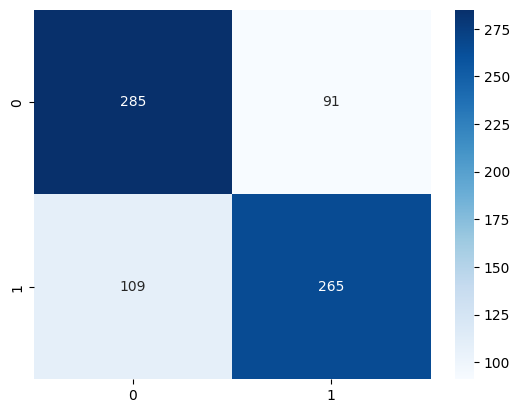

In [58]:
# Convert multilabel to single label
y_pred_prob_mdoel2 = model2.predict(x_test)

y_true_model2 = np.argmax(y_test, axis=1)
y_pred_proba_model2 = np.argmax(y_pred_prob_mdoel2, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_model2, y_pred_proba_model2)

# Plot the confusion matrix using Seaborn with integer formatting
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

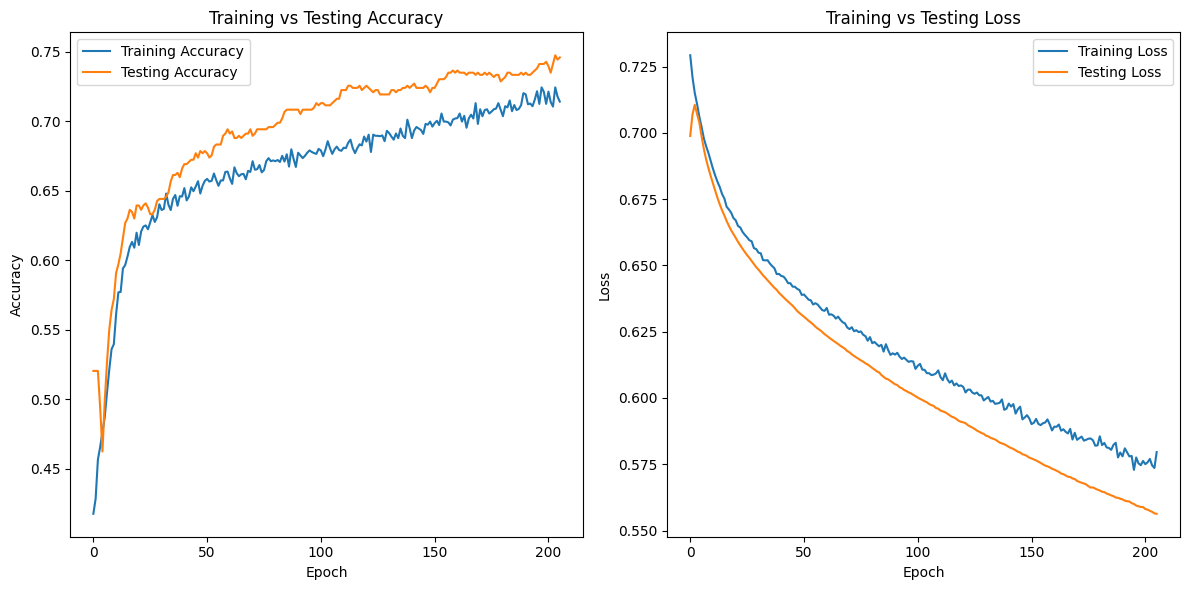

In [59]:
plot_accuracy_and_loss(history2)

In [60]:
loss, accuracy = model2.evaluate(x_train, y_train, verbose=1)
print("Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = model2.evaluate(x_test, y_test, verbose=1)
print("Testing: accuracy = %f  ;  loss = %f" % (accuracy, loss))

113/113 [==============================] - 1s 6ms/step - loss: 0.5734 - accuracy: 0.7171
Train: accuracy = 0.717054  ;  loss = 0.573376
24/24 [==============================] - 0s 6ms/step - loss: 0.5575 - accuracy: 0.7333
Testing: accuracy = 0.733333  ;  loss = 0.557489


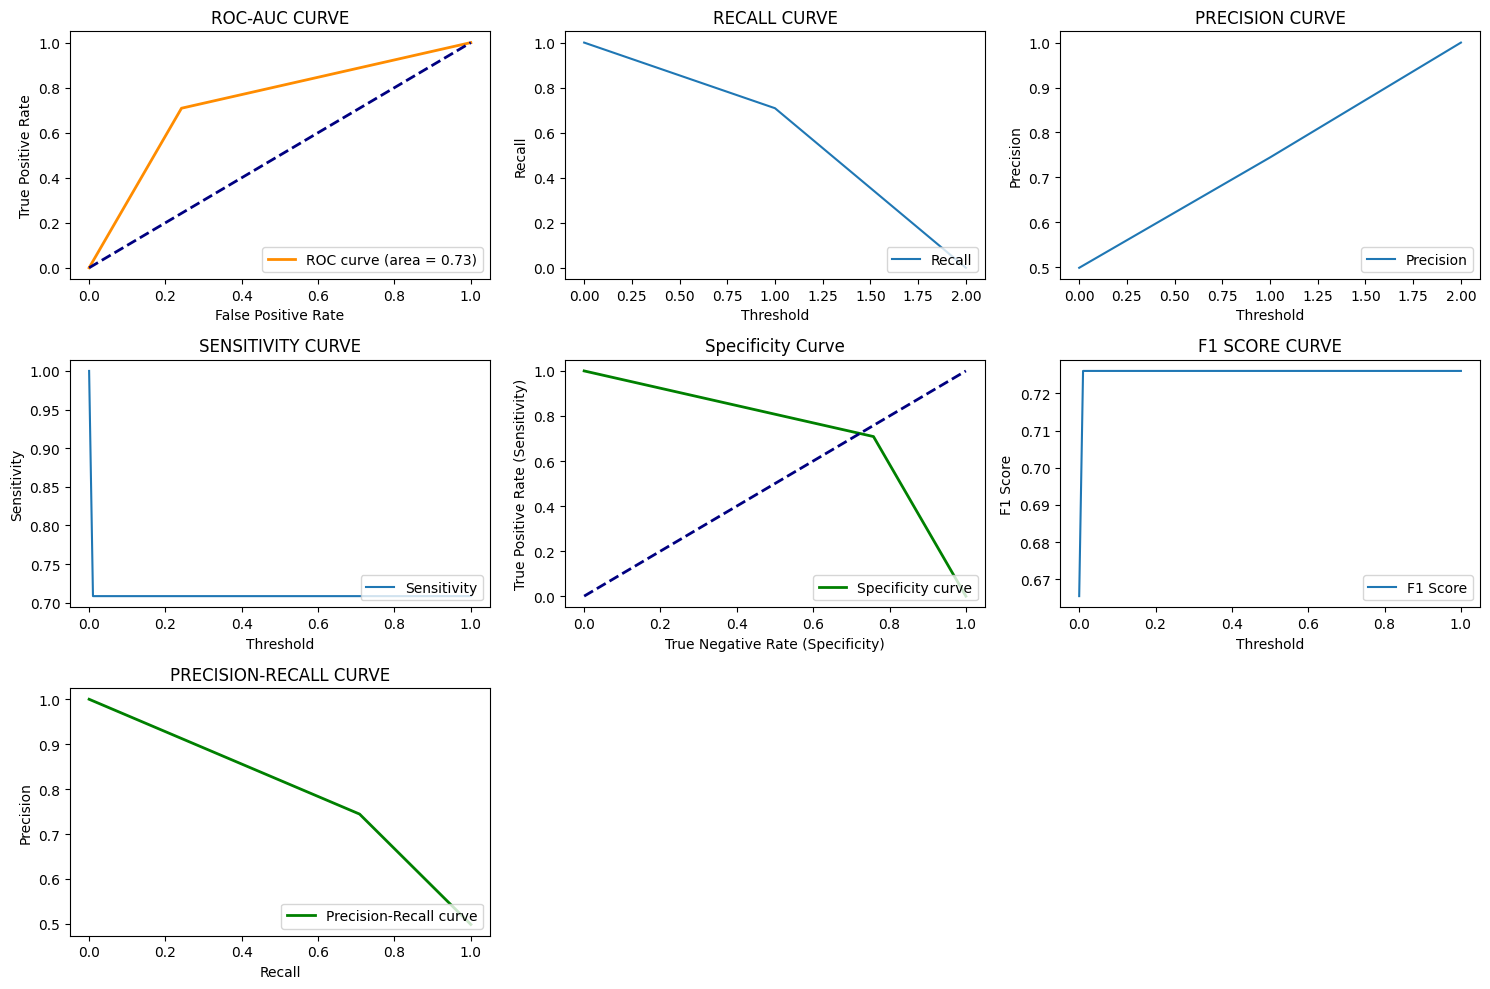

In [61]:
plot_curves(y_true_model2, y_pred_proba_model2)

In [62]:
calculate_and_print_metrics(np.argmax(y_test, axis=1), y_pred_proba_model2)

Accuracy: 0.7333
Precision: 0.7339
Recall: 0.7333
F1-score: 0.7331
Kappa score: 0.4666


# Save Weights

In [63]:
# model1.save_weights('saved_weights\MobileNetAttentin.h5')
# model2.save_weights('saved_weights\DepthwiseAttentionCNN.h5')

# Ensemble Model

In [65]:
from keras.models import Model, load_model
from keras.layers import Input, concatenate, Dense
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf



# Load weights into individual models
model1.load_weights('mobileV2_best_weights.h5')
model2.load_weights('DResNetAttention_loss_weights.h5')




def combined_model(model1, model2):
    input_shape = Input(shape=(100, 100, 3))
    output1 = model1(input_shape)
    output2 = model2(input_shape)
    concatenated_output = concatenate([output1, output2])

    x = Dense(100, activation='relu')(concatenated_output)
    x = Dense(50, activation='relu')(x)
    final_output = Dense(2, activation='softmax')(x)

    combined_model = Model(inputs=input_shape, outputs=final_output)

    # Use the provided custom loss and accuracy
    combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return combined_model



In [66]:
ensemble_model = combined_model(model1, model2)

In [67]:
history3 = train_ensemble_model(ensemble_model, x_train, y_train, x_validate, y_validate)

Epoch 1/300


2023-12-14 07:36:42.914646: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-12-14 07:36:44.818634: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


113/113 [==============================] - 14s 53ms/step - loss: 0.3637 - accuracy: 0.8904 - val_loss: 0.5769 - val_accuracy: 0.7994 - lr: 0.0010
Epoch 2/300
113/113 [==============================] - 5s 40ms/step - loss: 0.2399 - accuracy: 0.9136 - val_loss: 0.3122 - val_accuracy: 0.8809 - lr: 0.0010
Epoch 3/300
113/113 [==============================] - 5s 43ms/step - loss: 0.2140 - accuracy: 0.9233 - val_loss: 0.2743 - val_accuracy: 0.9107 - lr: 0.0010
Epoch 4/300
113/113 [==============================] - 5s 40ms/step - loss: 0.2012 - accuracy: 0.9203 - val_loss: 0.2624 - val_accuracy: 0.9028 - lr: 0.0010
Epoch 5/300
113/113 [==============================] - 5s 40ms/step - loss: 0.1880 - accuracy: 0.9250 - val_loss: 0.3270 - val_accuracy: 0.8668 - lr: 0.0010
Epoch 6/300
113/113 [==============================] - 5s 41ms/step - loss: 0.1435 - accuracy: 0.9455 - val_loss: 0.2248 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 7/300
113/113 [==============================] - 4s 39ms/step -

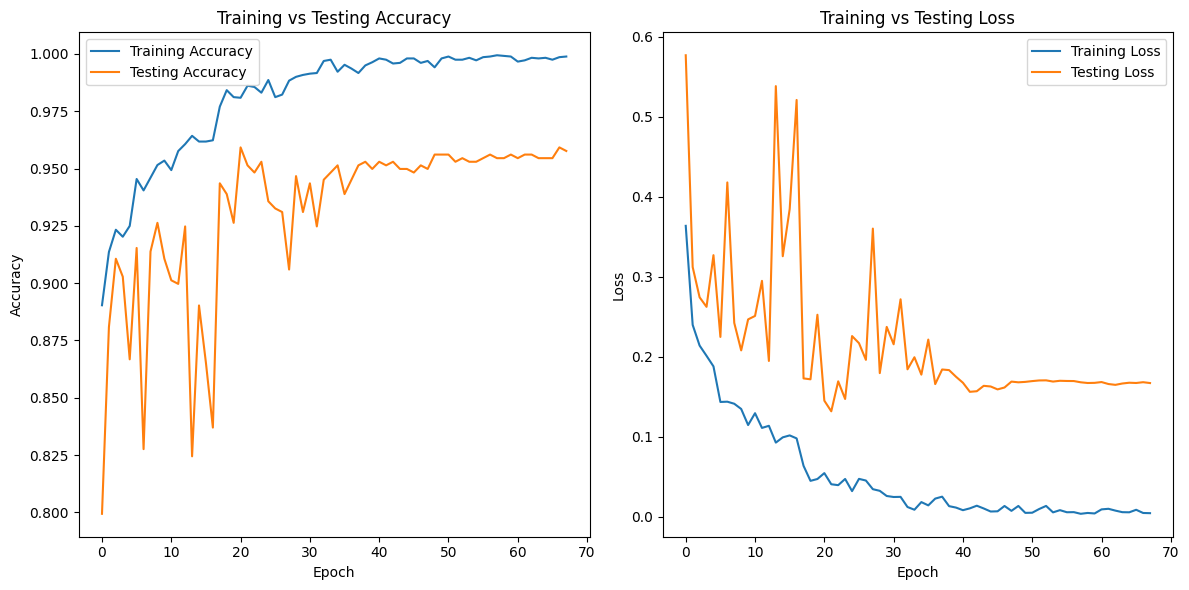

In [75]:
plot_accuracy_and_loss(history3)

24/24 [==============================] - 2s 13ms/step


<Axes: >

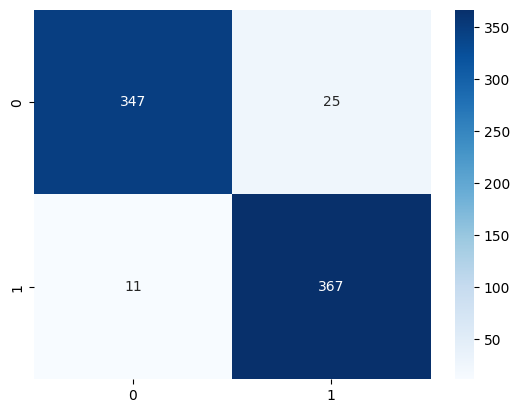

In [68]:
# Convert multilabel to single label
y_pred_prob_mdoel3 = ensemble_model.predict(x_test)

y_true_model3 = np.argmax(y_test, axis=1)
y_pred_proba_model3 = np.argmax(y_pred_prob_mdoel3, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_model3, y_pred_proba_model3)

# Plot the confusion matrix using Seaborn with integer formatting
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

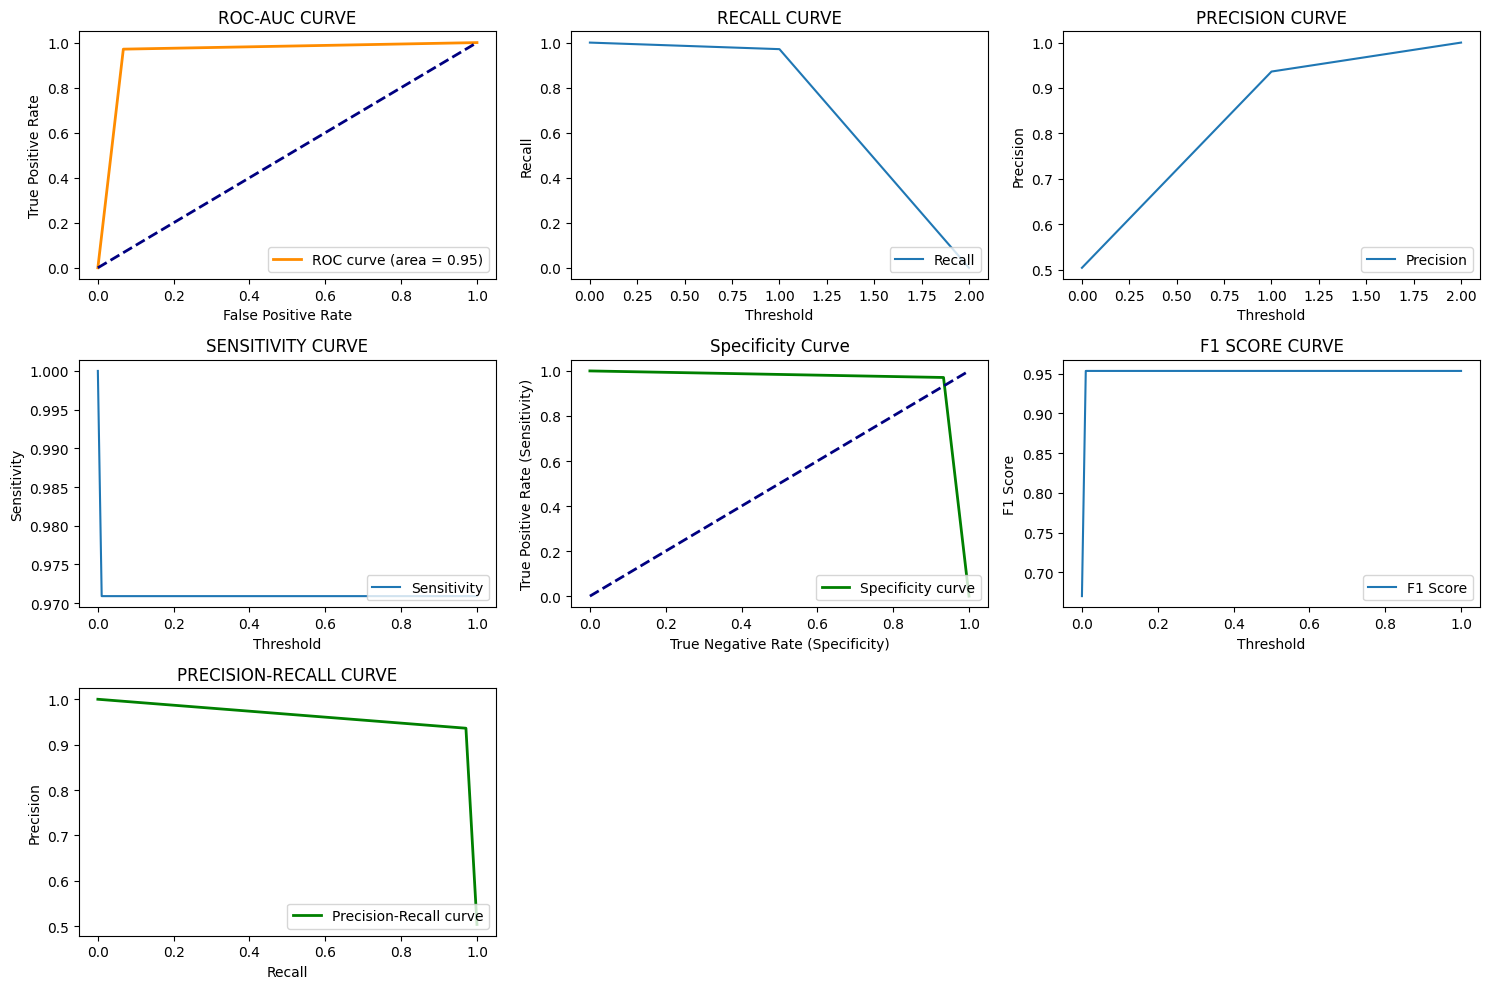

In [69]:
plot_curves(y_true_model3, y_pred_proba_model3)

In [70]:
calculate_and_print_metrics(np.argmax(y_test, axis=1), y_pred_proba_model3)

Accuracy: 0.9520
Precision: 0.9527
Recall: 0.9518
F1-score: 0.9520
Kappa score: 0.9040


In [71]:
loss, accuracy = ensemble_model.evaluate(x_train, y_train, verbose=1)
print("Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = ensemble_model.evaluate(x_test, y_test, verbose=1)
print("Testing: accuracy = %f  ;  loss = %f" % (accuracy, loss))

113/113 [==============================] - 1s 12ms/step - loss: 5.2410e-04 - accuracy: 1.0000
Train: accuracy = 1.000000  ;  loss = 0.000524
24/24 [==============================] - 2s 14ms/step - loss: 0.1611 - accuracy: 0.9520
Testing: accuracy = 0.952000  ;  loss = 0.161111


# Step 14 : Different Model Training

In [74]:
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
import matplotlib.pyplot as plt

# Define your input shape
input_shape = (100, 100, 3)  # Adjust this according to your data

# Create a list of pre-trained models
pretrained_models = [applications.VGG16, applications.ResNet50, applications.InceptionV3,
                     applications.MobileNetV2, applications.Xception, applications.DenseNet121,
                     applications.EfficientNetB0]

# Create lists to store accuracy and loss data
all_train_accuracy = []
all_val_accuracy = []
all_train_loss = []
all_val_loss = []

# Loop through each pre-trained model
for model_builder in pretrained_models:
    # Build the model
    base_model = model_builder(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification layers on top
    different_models = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dense(2, activation='softmax')  # Assuming binary classification
    ])

    # Compile the model
    different_models.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history4 = train_ensemble_model(different_models, x_train, y_train, x_validate, y_validate)

    # Append accuracy and loss data to lists
    all_train_accuracy.append(history4.history['accuracy'])
    all_val_accuracy.append(history4.history['val_accuracy'])
    all_train_loss.append(history4.history['loss'])
    all_val_loss.append(history4.history['val_loss'])




Epoch 1/50
113/113 [==============================] - 3s 21ms/step - loss: 0.2035 - accuracy: 0.9214 - val_loss: 0.1574 - val_accuracy: 0.9389 - lr: 0.0010
Epoch 2/50
113/113 [==============================] - 2s 17ms/step - loss: 0.0694 - accuracy: 0.9765 - val_loss: 0.1274 - val_accuracy: 0.9530 - lr: 0.0010
Epoch 3/50
113/113 [==============================] - 2s 21ms/step - loss: 0.0299 - accuracy: 0.9922 - val_loss: 0.1304 - val_accuracy: 0.9514 - lr: 0.0010
Epoch 4/50
113/113 [==============================] - 2s 17ms/step - loss: 0.0092 - accuracy: 0.9989 - val_loss: 0.1352 - val_accuracy: 0.9592 - lr: 0.0010
Epoch 5/50
113/113 [==============================] - 2s 18ms/step - loss: 0.0042 - accuracy: 0.9997 - val_loss: 0.1538 - val_accuracy: 0.9561 - lr: 0.0010
Epoch 6/50
113/113 [==============================] - 2s 17ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1326 - val_accuracy: 0.9655 - lr: 0.0010
Epoch 7/50
113/113 [==============================] - 2s 17ms/st

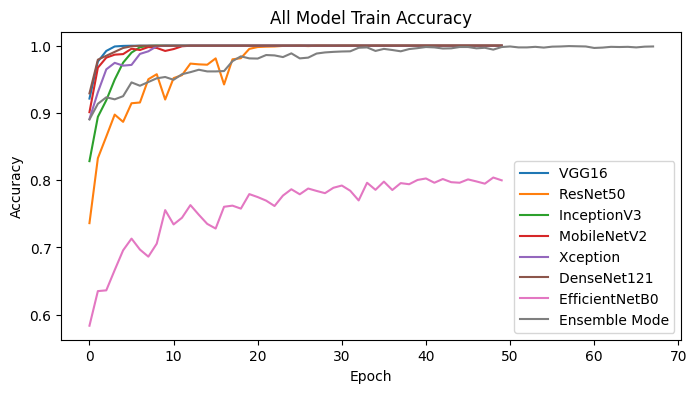

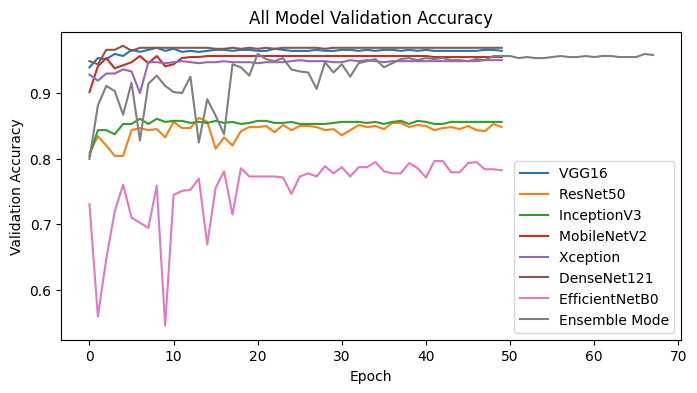

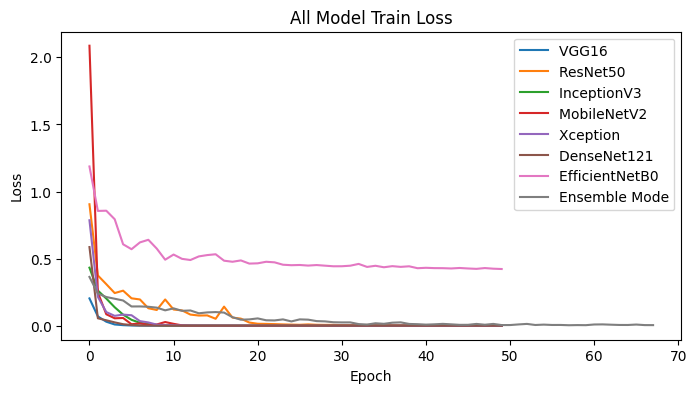

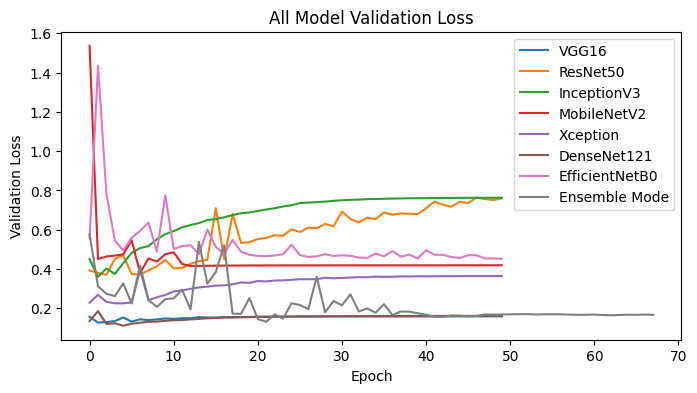

In [76]:
# Plot all accuracy curves
plt.figure(figsize=(8, 4))
for i, model_builder in enumerate(pretrained_models):
    plt.plot(all_train_accuracy[i], label=f'{model_builder.__name__} ')

plt.plot(history3.history['accuracy'], label=f'Ensemble Mode')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('All Model Train Accuracy')
plt.legend()
plt.show()
#plt.savefig('saved_png/accuracy.png')

# Plot all validation accuracy curves
plt.figure(figsize=(8, 4))
for i, model_builder in enumerate(pretrained_models):
    plt.plot(all_val_accuracy[i], label=f'{model_builder.__name__} ')

plt.plot(history3.history['val_accuracy'], label=f'Ensemble Mode')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('All Model Validation Accuracy')
plt.legend()
plt.show()
#plt.savefig('saved_png/val_accuracy.png')

# Plot all loss curves
plt.figure(figsize=(8, 4))
for i, model_builder in enumerate(pretrained_models):
    plt.plot(all_train_loss[i], label=f'{model_builder.__name__} ')

plt.plot(history3.history['loss'], label=f'Ensemble Mode')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('All Model Train Loss')
plt.legend()
plt.show()
#plt.savefig('saved_png/loss.png')

# Plot all validation loss curves
plt.figure(figsize=(8, 4))
for i, model_builder in enumerate(pretrained_models):
    plt.plot(all_val_loss[i], label=f'{model_builder.__name__}')

plt.plot(history3.history['val_loss'], label=f'Ensemble Mode')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('All Model Validation Loss')
plt.legend()
plt.show()
#plt.savefig('saved_png/val_loss.png')


In [ ]:
# model.save("skinDiseaseDetectionUsningCNN.h5")

In [ ]:
# from keras import backend as K
# import gc


# del model

# K.clear_session()
# gc.collect()



In [ ]:
# #You need to install numba using 'pip install numba'

# from numba import cuda

# cuda.select_device(0)
# cuda.close()